In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import logging
import os

In [2]:
device_10min = pd.read_csv('DeviceProfiles_600s.House.Electricity.csv', sep=';', decimal='.')

In [3]:
device_10min_renamed = device_10min.copy()
columns_renamed = ["Bath_Light_AM","Bath_Light_PM","Bath_WashingMachine","Bath_Dryer","Bath_HairDryer_AM","Bath_HairDryer_PM","Kitchen_Microwave_Breakfast","Kitchen_Microwave_Lunch","Kitchen_Microwave_Dinner","Kitchen_Refrigerator","Kitchen_ElectricKettle_Breakfast","Kitchen_ElectricKettle_Lunch","Kitchen_ElectricKettle_Dinner","Kitchen_KitchenStove_Breakfast","Kitchen_KitchenStove_Lunch","Kitchen_KitchenStove_Dinner","Kitchen_InductionCooking_Breakfast","Kitchen_InductionCooking_Lunch","Kitchen_InductionCooking_Dinner","Kitchen_Freezer","Kitchen_Dishwashers_Breakfast","Kitchen_Dishwashers_Lunch","Kitchen_Dishwashers_Dinner","Kitchen_Light_AM","Kitchen_Light_PM","Kitchen_Toaster_Breakfast","Kitchen_Toaster_Dinner","Kitchen_MiniPimer_Lunch","Kitchen_MiniPimer_Dinner","Kitchen_Blender_Breakfast","Kitchen_BakenOven_Breakfast","Kitchen_BakenOven_Dinner","Kitchen_CoffeeMachine_Breakfast","Kitchen_HandBlender","Kitchen_ExtractorHood_Breakfast","Kitchen_ExtractorHood_Lunch","Kitchen_ExtractorHood_Dinner","Bedroom_Light_AM_Workday","Bedroom_Light_AM_Weekend","Bedroom_Light_PM_Everyday","Bedroom_TV","Bedroom_Laptop","Bedroom_Smartphone","Bedroom_PlayStation_PM_Weekend","Bedroom_PlayStation_PM_Friday","Bedroom_SteamIron","Bedroom_ElectricAirHeater","Living_MusicEquipment","Living_SpeakersCinema","Living_TVCinema","Living_DigitalPiano_PM_Workday","Living_DigitalPiano_AM_Saturday","Living_Light_AM_Workday","Living_Light_PM_Workday","Living_Light_Weekend","Living_AirConditioning_PM_Workday","Living_AirConditioning_AM_Weekend","Living_AirConditioning_PM_Weekend","Living_AirConditioning_Night_Weekend","Living_Beamer","Living_CeilingFan_PM_Workday","Living_CeilingFan_AM_Weekend","Living_CeilingFan_PM_Weekend","Living_CeilingFan_Night_Weekend","Living_VacuumCleanerRobot","Living_DVB_PM_FridaySaturday","Living_DVB_PM_Sunday","Living_VacuumCleaner","Office_Speakers_AM","Office_Speakers_PM","Office_Computer","Office_Light","Office_Router","Office_PCMonitor1","Office_ElectricAirHeater","Office_Printer","Office_PCMonitor2","Garden_Treadmill","Garden_PumpSwimmingPool","Garden_Light","Garden_ScrewDriver","Garden_GardenSchredder","Garden_HammerDrill","Garden_HandheldCircular","Garden_Raclette"]
print(len(columns_renamed))
device_10min_renamed.columns.values[2:87] = columns_renamed

del device_10min_renamed['Electricity.Timestep']

device_10min_renamed['Time'] = pd.to_datetime(device_10min_renamed['Time'], format='%d-%m-%Y %H:%M')

files = [device_10min_renamed]
files_names = ['Perfiles 10 Min']
count = 0
for i in files:
    print('Matriz:', files_names[count])
    # print('Dim original',i.shape)
    i['Day'] = i['Time'].dt.day
    i['Month'] = i['Time'].dt.month
    i['Year'] = i['Time'].dt.year
    i['Hour'] = i['Time'].dt.hour
    i['Minute'] = i['Time'].dt.minute
    i.drop(columns=['Time'], inplace=True)
    print('Dimensiones:',i.shape)
    count += 1

85
Matriz: Perfiles 10 Min
Dimensiones: (52560, 90)


In [4]:
device_10min_renamed.head()

,Bath_Light_AM,Bath_Light_PM,Bath_WashingMachine,Bath_Dryer,Bath_HairDryer_AM,Bath_HairDryer_PM,Kitchen_Microwave_Breakfast,Kitchen_Microwave_Lunch,Kitchen_Microwave_Dinner,Kitchen_Refrigerator,...,Garden_ScrewDriver,Garden_GardenSchredder,Garden_HammerDrill,Garden_HandheldCircular,Garden_Raclette,Day,Month,Year,Hour,Minute
0,0.0,0.001917,0.0,0.0,0.0,0.035906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,2021,0,0
1,0.0,0.001797,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,2021,0,10
2,0.0,0.001730,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,2021,0,20
3,0.0,0.000410,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,2021,0,30
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,2021,0,40


In [5]:
device_10min_renamed.set_index(['Year','Month','Day','Hour','Minute'], inplace=True)
device_week_type = device_10min_renamed.loc[
    (device_10min_renamed.index.get_level_values('Month') == 1) & 
    (device_10min_renamed.index.get_level_values('Day') >= 4) & 
    (device_10min_renamed.index.get_level_values('Day') <= 10)]

In [6]:
device_week_type

Bath_Light_AM  Bath_Light_PM  Bath_WashingMachine  \
Year Month Day Hour Minute                                                      
2021 1     4   0    0                 0.0       0.001825                  0.0   
                    10                0.0       0.001784                  0.0   
                    20                0.0       0.001721                  0.0   
                    30                0.0       0.000208                  0.0   
                    40                0.0       0.000000                  0.0   
...                                   ...            ...                  ...   
           10  23   10                0.0       0.001752                  0.0   
                    20                0.0       0.001793                  0.0   
                    30                0.0       0.001714                  0.0   
                    40                0.0       0.001795                  0.0   
                    50                0.0       0.001769                  0.0   

                            Bath_Dryer  Bath_HairDryer_AM  Bath_HairDryer_PM  \
Year Month Day Hour Minute                                                     
2021 1     4   0    0              0.0                0.0           0.037724   
                    10             0.0                0.0           0.000000   
                    20             0.0                0.0           0.000000   
                    30             0.0                0.0           0.000000   
                    40             0.0                0.0           0.000000   
...                                ...                ...                ...   
           10  23   10             0.0                0.0           0.179518   
                    20             0.0                0.0           0.159462   
                    30             0.0                0.0           0.175258   
                    40             0.0                0.0           0.175144   
                    50             0.0                0.0           0.152903   

                            Kitchen_Microwave_Breakfast  \
Year Month Day Hour Minute                                
2021 1     4   0    0                               0.0   
                    10                              0.0   
                    20                              0.0   
                    30                              0.0   
                    40                              0.0   
...                                                 ...   
           10  23   10                              0.0   
                    20                              0.0   
                    30                              0.0   
                    40                              0.0   
                    50                              0.0   

                            Kitchen_Microwave_Lunch  Kitchen_Microwave_Dinner  \
Year Month Day Hour Minute                                                      
2021 1     4   0    0                           0.0                       0.0   
                    10                          0.0                       0.0   
                    20                          0.0                       0.0   
                    30                          0.0                       0.0   
                    40                          0.0                       0.0   
...                                             ...                       ...   
           10  23   10                          0.0                       0.0   
                    20                          0.0                       0.0   
                    30                          0.0                       0.0   
                    40                          0.0                       0.0   
                    50                          0.0                       0.0   

                            Kitchen_Refrigerator  ...  Office_Printer  \
Year Month Day Hour Minute            

In [7]:
filter_list = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0]
filter_series = pd.Series(filter_list, index=device_10min_renamed.columns)
reduced_device_week_type = device_week_type * filter_series
reduced_device_week_type = reduced_device_week_type.loc[:, (reduced_device_week_type != 0).any(axis=0)]

In [8]:
reduced_device_week_type

Bath_Light_AM  Bath_Light_PM  Bath_WashingMachine  \
Year Month Day Hour Minute                                                      
2021 1     4   0    0                 0.0       0.001825                  0.0   
                    10                0.0       0.001784                  0.0   
                    20                0.0       0.001721                  0.0   
                    30                0.0       0.000208                  0.0   
                    40                0.0       0.000000                  0.0   
...                                   ...            ...                  ...   
           10  23   10                0.0       0.001752                  0.0   
                    20                0.0       0.001793                  0.0   
                    30                0.0       0.001714                  0.0   
                    40                0.0       0.001795                  0.0   
                    50                0.0       0.001769                  0.0   

                            Bath_Dryer  Bath_HairDryer_AM  Bath_HairDryer_PM  \
Year Month Day Hour Minute                                                     
2021 1     4   0    0              0.0                0.0           0.037724   
                    10             0.0                0.0           0.000000   
                    20             0.0                0.0           0.000000   
                    30             0.0                0.0           0.000000   
                    40             0.0                0.0           0.000000   
...                                ...                ...                ...   
           10  23   10             0.0                0.0           0.179518   
                    20             0.0                0.0           0.159462   
                    30             0.0                0.0           0.175258   
                    40             0.0                0.0           0.175144   
                    50             0.0                0.0           0.152903   

                            Kitchen_Microwave_Breakfast  \
Year Month Day Hour Minute                                
2021 1     4   0    0                               0.0   
                    10                              0.0   
                    20                              0.0   
                    30                              0.0   
                    40                              0.0   
...                                                 ...   
           10  23   10                              0.0   
                    20                              0.0   
                    30                              0.0   
                    40                              0.0   
                    50                              0.0   

                            Kitchen_Microwave_Lunch  Kitchen_Microwave_Dinner  \
Year Month Day Hour Minute                                                      
2021 1     4   0    0                           0.0                       0.0   
                    10                          0.0                       0.0   
                    20                          0.0                       0.0   
                    30                          0.0                       0.0   
                    40                          0.0                       0.0   
...                                             ...                       ...   
           10  23   10                          0.0                       0.0   
                    20                          0.0                       0.0   
                    30                          0.0                       0.0   
                    40                          0.0                       0.0   
                    50                          0.0                       0.0   

                            Kitchen_Refrigerator  ...  Office_Speakers_AM  \
Year Month Day Hour Minute        

In [9]:
aggregated_devices = pd.DataFrame(index=reduced_device_week_type.index)
# Group columns by the prefix Word1.Word2 and aggregate each group
for prefix, group in reduced_device_week_type.groupby(lambda x: '_'.join(x.split('_')[:2]),axis=1):
    # Aggregate the group by taking the mean or any other method you prefer
    aggregated_devices[prefix] = group.sum(axis=1) 
aggregated_devices

C:\Users\juanjose.astudillo\AppData\Local\Temp\ipykernel_19144\3589474538.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for prefix, group in reduced_device_week_type.groupby(lambda x: '_'.join(x.split('_')[:2]),axis=1):


Bath_Dryer  Bath_HairDryer  Bath_Light  \
Year Month Day Hour Minute                                           
2021 1     4   0    0              0.0        0.037724    0.001825   
                    10             0.0        0.000000    0.001784   
                    20             0.0        0.000000    0.001721   
                    30             0.0        0.000000    0.000208   
                    40             0.0        0.000000    0.000000   
...                                ...             ...         ...   
           10  23   10             0.0        0.179518    0.001752   
                    20             0.0        0.159462    0.001793   
                    30             0.0        0.175258    0.001714   
                    40             0.0        0.175144    0.001795   
                    50             0.0        0.152903    0.001769   

                            Bath_WashingMachine  Bedroom_ElectricAirHeater  \
Year Month Day Hour Minute                                                   
2021 1     4   0    0                       0.0                        0.0   
                    10                      0.0                        0.0   
                    20                      0.0                        0.0   
                    30                      0.0                        0.0   
                    40                      0.0                        0.0   
...                                         ...                        ...   
           10  23   10                      0.0                        0.0   
                    20                      0.0                        0.0   
                    30                      0.0                        0.0   
                    40                      0.0                        0.0   
                    50                      0.0                        0.0   

                            Bedroom_Laptop  Bedroom_Smartphone  \
Year Month Day Hour Minute                                       
2021 1     4   0    0             0.012047            0.000017   
                    10            0.011734            0.000017   
                    20            0.011632            0.000005   
                    30            0.011377            0.000000   
                    40            0.012333            0.000000   
...                                    ...                 ...   
           10  23   10            0.011080            0.000017   
                    20            0.011224            0.000017   
                    30            0.010894            0.000016   
                    40            0.011516            0.000015   
                    50            0.011694            0.000017   

                            Bedroom_SteamIron  Bedroom_TV  \
Year Month Day Hour Minute                                  
2021 1     4   0    0                     0.0         0.0   
                    10                    0.0         0.0   
                    20                    0.0         0.0   
                    30                    0.0         0.0   
                    40                    0.0         0.0   
...                                       ...         ...   
           10  23   10                    0.0         0.0   
                    20                    0.0         0.0   
                    30                    0.0         0.0   
                    40                    0.0         0.0   
                    50                    0.0         0.0   

                            Garden_PumpSwimmingPool  ...  \
Year Month Day Hour Minute                           ...   
2021 1     4   0    0                           0.0  ...   
                    10                          0.0  ...   
                    20                          0.0  ...   
                    30                          0.0  ...   
                    40                          0.0  ...   
...                          

In [10]:
perfil_base = [0,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1]
perfil_extra = [1,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0]
print('Cantidad de Devices en perfil base: ',sum(perfil_base))
print('Cantidad de Devices en perfil extra: ',sum(perfil_extra))

filter_series = pd.Series(perfil_base, index=aggregated_devices.columns)
aggregated_perfil_base = aggregated_devices * filter_series
aggregated_perfil_base = aggregated_perfil_base.loc[:, (aggregated_perfil_base != 0).any(axis=0)]

filter_series2 = pd.Series(perfil_extra, index=aggregated_devices.columns)
aggregated_perfil_extra = aggregated_devices * filter_series2
aggregated_perfil_extra = aggregated_perfil_extra.loc[:, (aggregated_perfil_extra != 0).any(axis=0)]


Cantidad de Devices en perfil base:  20
Cantidad de Devices en perfil extra:  16


In [11]:
verify_perfil_base = aggregated_perfil_base.copy()  ##Copia de seguridad de perfil_base
aggregated_perfil_base

Bath_HairDryer  Bath_Light  Bath_WashingMachine  \
Year Month Day Hour Minute                                                    
2021 1     4   0    0             0.037724    0.001825                  0.0   
                    10            0.000000    0.001784                  0.0   
                    20            0.000000    0.001721                  0.0   
                    30            0.000000    0.000208                  0.0   
                    40            0.000000    0.000000                  0.0   
...                                    ...         ...                  ...   
           10  23   10            0.179518    0.001752                  0.0   
                    20            0.159462    0.001793                  0.0   
                    30            0.175258    0.001714                  0.0   
                    40            0.175144    0.001795                  0.0   
                    50            0.152903    0.001769                  0.0   

                            Bedroom_Laptop  Bedroom_Smartphone  \
Year Month Day Hour Minute                                       
2021 1     4   0    0             0.012047            0.000017   
                    10            0.011734            0.000017   
                    20            0.011632            0.000005   
                    30            0.011377            0.000000   
                    40            0.012333            0.000000   
...                                    ...                 ...   
           10  23   10            0.011080            0.000017   
                    20            0.011224            0.000017   
                    30            0.010894            0.000016   
                    40            0.011516            0.000015   
                    50            0.011694            0.000017   

                            Bedroom_SteamIron  Bedroom_TV  Kitchen_Blender  \
Year Month Day Hour Minute                                                   
2021 1     4   0    0                     0.0         0.0              0.0   
                    10                    0.0         0.0              0.0   
                    20                    0.0         0.0              0.0   
                    30                    0.0         0.0              0.0   
                    40                    0.0         0.0              0.0   
...                                       ...         ...              ...   
           10  23   10                    0.0         0.0              0.0   
                    20                    0.0         0.0              0.0   
                    30                    0.0         0.0              0.0   
                    40                    0.0         0.0              0.0   
                    50                    0.0         0.0              0.0   

                            Kitchen_ElectricKettle  Kitchen_Microwave  \
Year Month Day Hour Minute                                              
2021 1     4   0    0                          0.0                0.0   
                    10                         0.0                0.0   
                    20                         0.0                0.0   
                    30                         0.0                0.0   
                    40                         0.0                0.0   
...                                            ...                ...   
           10  23   10                         0.0                0.0   
                    20                         0.0                0.0   
                    30                         0.0                0.0   
                    40                         0.0                0.0   
                    50                         0.0                0.0   

                            Kitchen_Refrigerator  Living_DVB  \
Year Month Day Hour Minute                                     
2021 1     4   0    0                        0.0

In [12]:
verify_perfil_extra = aggregated_perfil_extra.copy()  ##Copia de seguridad de perfil_extra
aggregated_perfil_extra

Bath_Dryer  Bedroom_ElectricAirHeater  \
Year Month Day Hour Minute                                          
2021 1     4   0    0              0.0                        0.0   
                    10             0.0                        0.0   
                    20             0.0                        0.0   
                    30             0.0                        0.0   
                    40             0.0                        0.0   
...                                ...                        ...   
           10  23   10             0.0                        0.0   
                    20             0.0                        0.0   
                    30             0.0                        0.0   
                    40             0.0                        0.0   
                    50             0.0                        0.0   

                            Garden_PumpSwimmingPool  Garden_Treadmill  \
Year Month Day Hour Minute                                              
2021 1     4   0    0                           0.0               0.0   
                    10                          0.0               0.0   
                    20                          0.0               0.0   
                    30                          0.0               0.0   
                    40                          0.0               0.0   
...                                             ...               ...   
           10  23   10                          0.0               0.0   
                    20                          0.0               0.0   
                    30                          0.0               0.0   
                    40                          0.0               0.0   
                    50                          0.0               0.0   

                            Kitchen_BakenOven  Kitchen_CoffeeMachine  \
Year Month Day Hour Minute                                             
2021 1     4   0    0                     0.0                    0.0   
                    10                    0.0                    0.0   
                    20                    0.0                    0.0   
                    30                    0.0                    0.0   
                    40                    0.0                    0.0   
...                                       ...                    ...   
           10  23   10                    0.0                    0.0   
                    20                    0.0                    0.0   
                    30                    0.0                    0.0   
                    40                    0.0                    0.0   
                    50                    0.0                    0.0   

                            Kitchen_Dishwashers  Kitchen_ExtractorHood  \
Year Month Day Hour Minute                                               
2021 1     4   0    0                       0.0                    0.0   
                    10                      0.0                    0.0   
                    20                      0.0                    0.0   
                    30                      0.0                    0.0   
                    40                      0.0                    0.0   
...                                         ...                    ...   
           10  23   10                      0.0                    0.0   
                    20                      0.0                    0.0   
                    30                      0.0                    0.0   
                    40                      0.0                    0.0   
                    50                      0.0                    0.0   

                            Kitchen_Freezer  Kitchen_InductionCooking  \
Year Month Day Hour Minute                                              
2021 1     4   0    0                   0.0                       0.0   
                    10                  0.0                  

In [13]:
def plot_column(df, column_name):
    # Resetear el índice para trabajar con los datos
    df_reset = df.reset_index()

    # Crear una columna de tiempo basada en el índice
    df_reset['Datetime'] = pd.to_datetime(df_reset[['Year', 'Month', 'Day', 'Hour', 'Minute']])

    # Graficar la columna seleccionada
    plt.figure(figsize=(12, 6))
    plt.plot(df_reset['Datetime'], df_reset[column_name], label=column_name, color='b')

    # Personalización del gráfico
    plt.title(f'Consumo Energético - {column_name}', fontsize=16)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Consumo', fontsize=12)
    plt.grid(True)
    plt.legend()

    # Ajustar el diseño para evitar solapamientos
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

def plot_filtered_data(day_data, day_name, column):
    """
    Grafica los datos ya filtrados de un día específico.

    Parámetros:
    - day_data: Serie o lista con los datos del día.
    - day_name: Nombre del día para el título y la etiqueta del gráfico.
    """
    # Validar si el tamaño de los datos corresponde a un día típico (144 valores para intervalos de 10 minutos)
    if len(day_data) != 144:
        print(f"Advertencia: Se esperaban 144 datos para un día típico, pero se recibieron {len(day_data)}.")
    
    # Crear un índice de tiempo para las 24 horas con intervalos de 10 minutos
    time_index = pd.date_range(start='00:00', end='23:50', freq='10T')

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(time_index, day_data, marker='o', linestyle='-', label=f"Consumo - {day_name}")

    # Personalizar el gráfico
    plt.title(f"Consumo Energético - {column} - {day_name}", fontsize=16)
    plt.xlabel("Hora del día", fontsize=12)
    plt.ylabel("Consumo Energético", fontsize=12)
    plt.grid(True)
    plt.legend()

    # Rotar etiquetas del eje X
    # plt.xticks(time_index[::6], rotation=45)  # Mostrar una etiqueta cada hora
    plt.xticks(time_index[::6], [t.strftime('%H:%M') for t in time_index[::6]], rotation=45)
    plt.tight_layout()
    plt.show()

def plot_shifted_data(filtered_data, shifted_vector):
    """
    Grafica los datos originales y los datos desplazados.

    Parámetros:
    - filtered_data: Serie o lista de valores originales.
    - shifted_vector: Nuevo vector con los intervalos desplazados.
    """
    time_indices = np.arange(len(filtered_data)) * 10 / 60  # Convertir a horas
    time_index = pd.date_range(start='00:00', end='23:50', freq='10T')

    plt.figure(figsize=(10, 6))
    plt.plot(time_index, filtered_data, label="Datos originales", alpha=0.7)
    plt.plot(time_index, shifted_vector, label="Datos desplazados", linestyle="--", alpha=0.7)
    plt.xlabel("Hora del día")
    plt.ylabel("Valor")
    plt.title("Datos originales y desplazados")
    plt.legend()
    plt.xticks(time_index[::6], [t.strftime('%H:%M') for t in time_index[::6]], rotation=45)
    plt.grid()
    plt.show()

In [14]:
def identify_active_intervals(data, threshold=0):

    active_intervals = []  # Lista para almacenar los intervalos
    start_index = None  # Índice de inicio de un intervalo activo

    for i, value in enumerate(data):
        if value > 0:
            if start_index is None:
                start_index = i  # Marca el inicio del intervalo
        else:
            if start_index is not None:
                # Si termina el intervalo activo, calcular duración y guardar
                end_index = i
                duration = (end_index - start_index + 1) * 10  # Duración en minutos
                active_intervals.append((start_index, end_index, duration))
                start_index = None

    # Manejar caso si el último intervalo termina al final del día
    if start_index is not None:
        end_index = len(data) - 1
        duration = (end_index - start_index + 1) * 10
        active_intervals.append([start_index, end_index, duration])

    # Mostrar resultados
    if active_intervals:
        print("Se encontraron los siguientes intervalos activos:")
        for start, end, duration in active_intervals:
            start_time = f"{(start * 10) // 60:02}:{(start * 10) % 60:02}"
            end_time = f"{(end * 10) // 60:02}:{(end * 10) % 60:02}"
            
            print(f"Inicio: {start_time}, Fin: {end_time}, Duración: {duration} minutos")  
    else:
        print("No se encontraron intervalos activos.")

    return active_intervals


def get_dia_data(data, dia_semana):

    pasos_por_dia = 144  # Suponiendo datos cada 10 minutos
    dias_totales = len(data) // pasos_por_dia
    indices_dia = [i for i in range(len(data)) if i // pasos_por_dia % 7 == (dia_semana - 1)]
    return data.iloc[indices_dia]


def get_dia_indices(data_input, dia):
    # Generar índices compatibles con el multiíndice
    pasos_por_dia = 144  # 144 intervalos por día (ejemplo)
    indices_dia = data_input.index[data_input.index.get_level_values('Day') == dia]
    return indices_dia


def actualizar_dataframe(df_input_verified, indices_dia, selected_column, day, resultado):

    # Mapeo de días
    dias_semana = {
            '4': "Lunes",
            '5': "Martes",
            '6': "Miércoles",
            '7': "Jueves",
            '8': "Viernes",
            '9': "Sábado",
            '10': "Domingo"
    }

    nombre_a_numero = {v: k for k, v in dias_semana.items()}  # Inversión del diccionario
    numero = int(nombre_a_numero[day])

    day_indices = df_input_verified.xs(numero, level='Day', drop_level=False).index
    # Verificamos que el índice de 'vector' exista en df_input_verified
    common_idx = resultado.index.intersection(df_input_verified.index)
    if len(common_idx) == 0:
        raise ValueError("No }se encontraron índices en común entre el vector y df_input_verified para el día especificado.")
    
    # Asignar valores a la columna especificada
    df_input_verified.loc[common_idx, selected_column] = resultado.loc[common_idx].values

    all_idx = df_input_verified.index
    non_common_idx = all_idx.difference(common_idx)
    df_input_verified.loc[non_common_idx, selected_column] = 0.0
    
    print(f"Valores actualizados en la selected_columna '{selected_column}' para el día {numero}.")
    return df_input_verified

In [15]:
def setup_logger():
    # Generar el nombre del archivo con la fecha y hora actuales
    date_str = datetime.datetime.now().strftime("%Y%m%d_%H%M")  # AAAAMMDD_HHMM
    log_file = f"general_log_{date_str}.txt"

    logger = logging.getLogger(__name__)
    logger.setLevel(logging.INFO)

    # Evita agregar múltiples handlers si el logger ya está configurado
    if not logger.handlers:
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        fh = logging.FileHandler(log_file, mode='a', encoding='utf-8')
        fh.setFormatter(formatter)
        logger.addHandler(fh)

    return logger

In [16]:
def seleccion_funcion(data, selected_column, day):
    print('Trabajando con Device:', selected_column)
    log_file = "unico_archivo_log.txt"
    temp_vector = data.copy()
    while True:
        print("\nElige una opción:")
        print("1. Ejecutar función Desplazar")
        print("2. Ejecutar función Recortar")
        print("3. Ejecutar función Replicar")
        print("4. Guardar cambios en el DataFrame y salir")
        print("0. Salir sin guardar cambios")
        choice = input("Seleccione la función que quiere utilizar: ")
        if choice == "1":
            temp_vector = function_desplazar(temp_vector, selected_column, day, log_file)
        elif choice == "2":
            temp_vector = function_recortar(temp_vector, selected_column, day, log_file)
        elif choice == "3":
            temp_vector = function_replicar(temp_vector, selected_column, day, log_file)
        elif choice == "4":
            # output_csv = actualizar_dataframe(df_input_verified, data, selected_column, day, temp_vector)
            return temp_vector
            # break
        elif choice == "0":
            print("Saliendo sin guardar cambios.")
            break
        else:
            print("Opción inválida. Por favor, elige 1, 2, 3 o 0.")
    return temp_vector



def function_desplazar(data, selected_column, day, log_file, threshold=0):
    print("Ejecutando función desplazar:")
    intervalos = identify_active_intervals(data, threshold)   ### Lista con listas :[start_index, end_index, duration]
    # shifted_vector = np.full_like(data, 0, dtype=float)
    shifted_vector = data.copy()
    shifted_vector[:] = 0.0
    # Iterar sobre cada intervalo activo y pedir el desplazamiento

    if not intervalos:
        print("No se encontraron intervalos activos que superen el threshold.")
        with open(log_file, "a") as log:
            log.write("No se encontraron intervalos activos.\n")
        return shifted_vector

    for idx, (start, end, duration) in enumerate(intervalos):
        start_time = f"{(start * 10) // 60:02}:{(start * 10) % 60:02}"
        end_time = f"{(end * 10) // 60:02}:{(end * 10) % 60:02}"
        print(f"\nIntervalo {idx + 1}: Inicio = {start_time}, Fin = {end_time}, Duración = {duration} minutos.")
        while True:
            try:
                # Consultar al usuario cuánto desplazar este intervalo
                time_desplazar = int(input("Introduce la cantidad de minutos para desplazar este intervalo: "))
                shift_steps = time_desplazar // 10  # Convertir minutos a pasos de 10 minutos
                break
            except ValueError:
                print("Por favor, introduce un número válido.")
        
        # Aplicar el desplazamiento para este intervalo
        for i in range(start, end):
            new_index = i + shift_steps
            if 0 <= new_index < len(data):  # Validar que no se salga del rango
                shifted_vector.iloc[new_index] += data.iloc[i]
        
        # start_time_2 = f"{(new_index * 10) // 60:02}:{(start * 10) % 60:02}"
        # end_time_2 = f"{(end * 10) // 60:02}:{(end * 10) % 60:02}"

        with open(log_file, "a") as log:
            log.write(f"Device {selected_column}:\n")
            log.write(f"Dia seleccionado {day}:\n")
            log.write(f"Intervalo {idx + 1}:\n")
            log.write(f"  Inicio original: {start_time}, Fin original: {end_time}, Duración: {duration} pasos\n")
            log.write(f"  Desplazamiento aplicado: {time_desplazar} minutos ({shift_steps} pasos)\n")
            log.write(f"  Nuevo inicio: {start + shift_steps if 0 <= start + shift_steps < len(data) else 'Fuera de rango'}\n")
            log.write(f"  Nuevo fin: {end + shift_steps if 0 <= end + shift_steps < len(data) else 'Fuera de rango'}\n")
            log.write("\n")
        
    plot_shifted_data(data, shifted_vector)
    return shifted_vector

def function_recortar(data, selected_column, day, log_file, threshold=0):
    print("Ejecutando función recortar...")
    # Identificar intervalos activos por encima del threshold
    intervalos = identify_active_intervals(data, threshold)
    cut_vector = data.copy()
    cut_vector[:] = 0.0
    
    if not intervalos:
        print("No se encontraron intervalos activos que superen el threshold.")
        with open(log_file, "a") as log:
            log.write(f"No se encontraron intervalos activos para {selected_column} en {day}.\n")
        return data

    # Crear o vaciar el archivo de log
    with open(log_file, "w") as log:
        log.write("Log de recortes:\n")
        log.write(f"Columna: {selected_column}, Día: {day}, Threshold: {threshold}\n\n")

    # Procesar cada intervalo activo
    for idx, (start, end, duration) in enumerate(intervalos):
        start_time = f"{(start * 10) // 60:02}:{(start * 10) % 60:02}"
        end_time = f"{(end * 10) // 60:02}:{(end * 10) % 60:02}"
        print(f"\nIntervalo {idx + 1}: Inicio = {start_time}, Fin = {end_time}, Duración = {duration} minutos.")
        
        while True:
            try:
                # Solicitar la nueva duración al usuario
                new_duration = int(input(f"Duración deseada para este intervalo (en minutos, debe ser menor o igual a {duration}): "))
                if new_duration % 10 != 0:
                    print("La duración debe ser un múltiplo de 10 minutos.")
                    continue
                
                new_steps = new_duration // 10  # Convertir minutos a pasos de 10 minutos
                
                if new_steps > duration:
                    print("La nueva duración no puede ser mayor al intervalo original.")
                else:
                    break
            except ValueError:
                print("Por favor, introduce un número válido.")

        # Aplicar el recorte al intervalo
        new_end = start + new_steps
        cut_vector.iloc[start:new_end] = data.iloc[start:new_end]
    
        # Registrar en el log
        with open(log_file, "a") as log:
            log.write(f"Intervalo {idx + 1}:\n")
            log.write(f"  Inicio original: {start_time}, Fin original: {end_time}, Duración original: {duration} minutos\n")
            log.write(f"  Nueva duración: {new_duration} minutos ({new_steps} minutos)\n")
            log.write(f"  Nuevo fin: {new_end}\n")
            log.write("\n")
    
    plot_shifted_data(data, cut_vector)
    return cut_vector

def function_replicar(data, selected_column, day, log_file, threshold=0):
    print("Ejecutando función replicar.")

    # print(data)

    # print("Estoy a punto de exportar data.csv...")
    # df_result0 = data.to_frame(name=selected_column)
    # df_result0.to_csv("data.csv", index=True, index_label=["Year", "Month", "Day", "Hour", "Minute"], decimal='.', sep=',', encoding='utf-8')
    
    # print("Exportación a data.csv finalizada correctamente.")
    
    # Identificar intervalos activos por encima del threshold
    intervalos = identify_active_intervals(data, threshold)
    new_vector = data.copy()
    
    if not intervalos:
        print("No se encontraron intervalos activos que superen el threshold.")
        with open(log_file, "a") as log:
            log.write(f"No se encontraron intervalos activos para {selected_column} en {day}.\n")
        return data

    # Crear o vaciar el archivo de log
    with open(log_file, "w") as log:
        log.write("Log de réplicas:\n")
        log.write(f"Columna: {selected_column}, Día: {day}, Threshold: {threshold}\n\n")

    # Procesar cada intervalo activo
    for idx, (start, end, duration) in enumerate(intervalos):
        start_time = f"{(start * 10) // 60:02}:{(start * 10) % 60:02}"
        end_time = f"{(end * 10) // 60:02}:{(end * 10) % 60:02}"
        print(f"\nIntervalo {idx + 1}: Inicio = {start_time}, Fin = {end_time}, Duración = {duration} minutos.")
        
        # Preguntar si el intervalo será replicado
        replicar = input("¿Deseas replicar este intervalo? (s/n): ").strip().lower()
        if replicar != 's':
            print(f"Intervalo {idx + 1} no será replicado.")
            continue

        while True:
            try:
                # Solicitar el horario de inicio para la réplica
                replica_hora_inicio = int(input("Indica la hora de inicio para la réplica (en minutos desde 00:00, múltiplo de 10): "))
                if replica_hora_inicio % 10 != 0:
                    print("La hora de inicio debe ser un múltiplo de 10 minutos.")
                    continue
                
                replica_inicio = replica_hora_inicio // 10  # Convertir minutos a pasos de 10 minutos
                if replica_inicio < 0 or replica_inicio >= len(data):
                    print("La hora de inicio está fuera del rango de los datos.")
                else:
                    break
            except ValueError:
                print("Por favor, introduce un número válido.")

        while True:
            try:
                # Solicitar la duración para la réplica
                replica_duracion = int(input(f"Duración deseada para la réplica (en minutos, múltiplo de 10, máximo {duration * 10}): "))
                if replica_duracion % 10 != 0:
                    print("La duración debe ser un múltiplo de 10 minutos.")
                    continue
                
                replica_steps = replica_duracion // 10  # Convertir minutos a pasos de 10 minutos
                
                if replica_steps > duration:
                    print("La duración no puede exceder la duración del intervalo original.")
                elif replica_inicio + replica_steps > len(data):
                    print("La réplica excede el rango de los datos. Ajusta la hora de inicio o la duración.")
                else:
                    break
            except ValueError:
                print("Por favor, introduce un número válido.")
        
        # Aplicar la réplica al intervalo
        lista_valores = data.values.tolist()
        lista_valores = lista_valores[start:start+replica_steps]
        lista_valores = [float(x) for x in lista_valores]
        new_vector.iloc[replica_inicio:replica_inicio+replica_steps] += lista_valores

        # Registrar en el log
        with open(log_file, "a") as log:
            log.write(f"Intervalo original {idx + 1}:\n")
            log.write(f"  Inicio: {start}, Fin: {end}, Duración: {duration} pasos\n")
            log.write(f"Réplicas:\n")
            log.write(f"  Hora de inicio de réplica: {replica_hora_inicio} minutos ({replica_inicio} minutos)\n")
            log.write(f"  Duración de réplica: {replica_duracion} minutos ({replica_steps} minutos)\n")
            log.write("\n")

    plot_shifted_data(data, new_vector)

    # new_vector.to_csv("new_vector.csv", index=True, index_label=["Year", "Month", "Day", "Hour", "Minute"], decimal='.', sep=',', encoding='utf-8')
    # df_result = new_vector.to_frame(name=selected_column)
    # df_result.to_csv("replica_result.csv", index=True, index_label=["Year", "Month", "Day", "Hour", "Minute"], decimal='.', sep=',',encoding='utf-8')
    
    return new_vector

In [17]:
def dia_semana(data_input, selected_column, run_funcion=True):
    while True:
        print("Elige un día tipo de la semana:")
        print("1. Lunes")
        print("2. Martes")
        print("3. Miércoles")
        print("4. Jueves")
        print("5. Viernes")
        print("6. Sábado")
        print("7. Domingo")
        print("0. Salir")
        dia = input('Elige un día de la semana (1 al 7): ')
        
        if dia == '0':
            print("Saliendo del programa.")
            break
        
        # Mapeo de días
        dias_semana = {
            '1': "Lunes",
            '2': "Martes",
            '3': "Miércoles",
            '4': "Jueves",
            '5': "Viernes",
            '6': "Sábado",
            '7': "Domingo"
        }
        
        if dia not in dias_semana:
            print("Por favor selecciona una opción válida (1 al 7).")
            continue
        
        dia_nombre = dias_semana[dia]
        print(f"Has elegido el día {dia_nombre}.")
        
        # Filtrar los datos del día seleccionado
        dia_data = get_dia_data(data_input, int(dia))
        plot_filtered_data(dia_data, dia_nombre, selected_column)
        
        if run_funcion:
            print(f"Aplicando función al día {dia_nombre}...")
            resultado = seleccion_funcion(dia_data, selected_column, dia_nombre)
        else:
            # No ejecutamos seleccion_funcion, solo devolvemos dia_data
            resultado = dia_data

        break 
    return resultado

In [18]:
def verify_data(data_input):
    global df_input_verified
    df_input_verified = data_input.copy()
    print("Current working directory:", os.getcwd())
    # df_input_verified[:] = np.nan  # Asigna NaN a todos los valores del DataFrame
    df_result = pd.DataFrame()
    
    aux = 0
    for column_name in data_input.columns:
        selected_column = column_name
        data = data_input[column_name]
        clear_output(wait=True)
        plot_column(data, selected_column)
        while True:
            print("¿Está el gráfico correcto?:")
            print("1. True")
            print("2. False")
            print("0. Salir")
            check = input('¿Está el gráfico correcto?: 1 o 2')
            if check == '1':
                print("El gráfico está correcto.")
                day_vector = dia_semana(data, selected_column, run_funcion=False)
                day_vector_hour_minute = day_vector.droplevel(['Year', 'Month', 'Day'])
                day_vector_hour_minute = day_vector_hour_minute.astype(float)
                if df_result.empty:
                    df_result = pd.DataFrame(index=day_vector_hour_minute.index)
                df_result[column_name] = day_vector_hour_minute.values
                break
            elif check == '2':
                print("El gráfico está incorrecto.")
                day_vector = dia_semana(data, selected_column, run_funcion=True)
                day_vector_hour_minute = day_vector.droplevel(['Year', 'Month', 'Day'])
                day_vector_hour_minute = day_vector_hour_minute.astype(float)
                if df_result.empty:
                    df_result = pd.DataFrame(index=day_vector_hour_minute.index)
                df_result[column_name] = day_vector_hour_minute.values

                if df_result is not None:
                    df_result.to_csv('DATAFRAME_OUTPUT_TEST.csv', decimal='.', sep=',', index=True, index_label=['Hour', 'Minute'])
                    print("Cambios guardados en el DataFrame.")
                break
            elif check == '0':
                print("Has decidido salir del programa.")

                if df_result is not None:
                    df_result.to_csv('DATAFRAME_OUTPUT_TEST.csv', decimal='.', sep=',', index=True, index_label=['Hour', 'Minute'])
                    print("Cambios guardados en el DataFrame.")
                return df_result
            else:
                print("Opción inválida, por favor elige 1 o 2.")

        aux = aux + 1

    # if df_result is not None:
    #     df_result.to_csv('DATAFRAME_OUTPUT_TEST.csv', decimal='.', sep=',', index=True, index_label=['Hour', 'Minute'])
    #     print("Cambios guardados en el DataFrame.")

    return df_result

In [19]:
print('Perfil Base')
print(aggregated_perfil_base.columns)
print()
print('Perfil Extra')
print(aggregated_perfil_extra.columns)

Perfil Base
Index(['Bath_HairDryer', 'Bath_Light', 'Bath_WashingMachine', 'Bedroom_Laptop',
       'Bedroom_Smartphone', 'Bedroom_SteamIron', 'Bedroom_TV',
       'Kitchen_Blender', 'Kitchen_ElectricKettle', 'Kitchen_Microwave',
       'Kitchen_Refrigerator', 'Living_DVB', 'Living_VacuumCleaner',
       'Office_Computer', 'Office_Light', 'Office_PCMonitor1',
       'Office_PCMonitor2', 'Office_Printer', 'Office_Router',
       'Office_Speakers'],
      dtype='object')

Perfil Extra
Index(['Bath_Dryer', 'Bedroom_ElectricAirHeater', 'Garden_PumpSwimmingPool',
       'Garden_Treadmill', 'Kitchen_BakenOven', 'Kitchen_CoffeeMachine',
       'Kitchen_Dishwashers', 'Kitchen_ExtractorHood', 'Kitchen_Freezer',
       'Kitchen_InductionCooking', 'Kitchen_KitchenStove',
       'Living_AirConditioning', 'Living_CeilingFan', 'Living_MusicEquipment',
       'Living_SpeakersCinema', 'Living_TVCinema'],
      dtype='object')


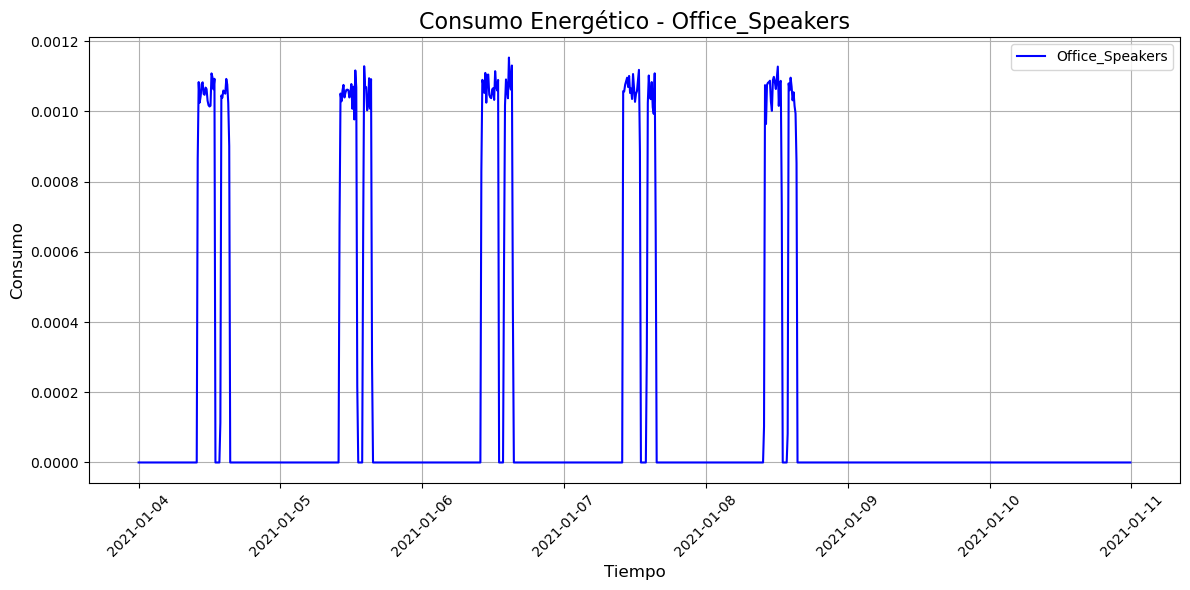

¿Está el gráfico correcto?:
1. True
2. False
0. Salir
El gráfico está incorrecto.
Elige un día tipo de la semana:
1. Lunes
2. Martes
3. Miércoles
4. Jueves
5. Viernes
6. Sábado
7. Domingo
0. Salir
Has elegido el día Miércoles.


C:\Users\juanjose.astudillo\AppData\Local\Temp\ipykernel_19144\216895865.py:39: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start='00:00', end='23:50', freq='10T')


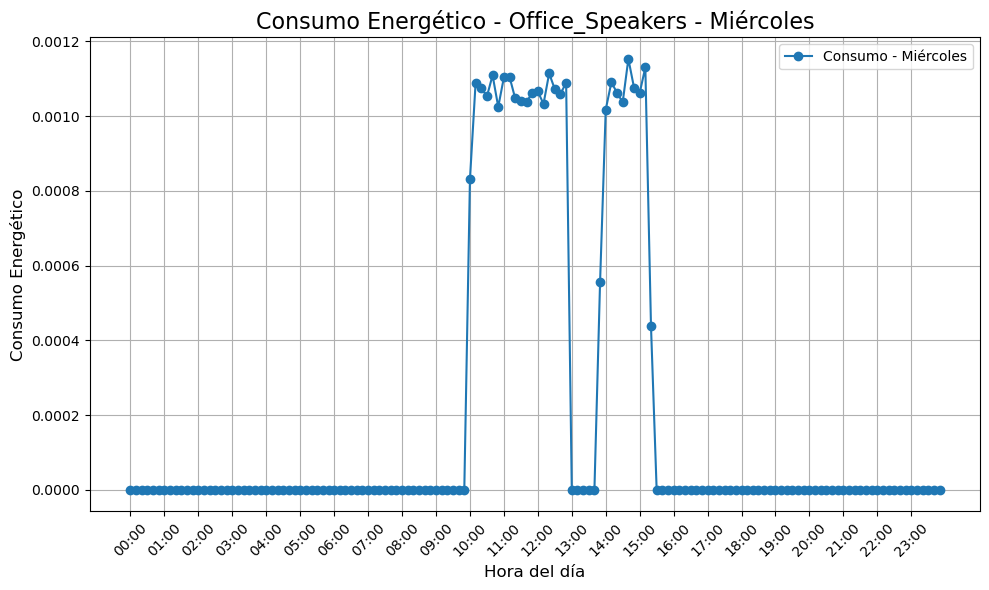

Aplicando función al día Miércoles...
Trabajando con Device: Office_Speakers

Elige una opción:
1. Ejecutar función Desplazar
2. Ejecutar función Recortar
3. Ejecutar función Replicar
4. Guardar cambios en el DataFrame y salir
0. Salir sin guardar cambios
Cambios guardados en el DataFrame.


Bath_HairDryer  Bath_Light  Bath_WashingMachine  Bedroom_Laptop  \
Hour Minute                                                                    
0    0                  0.0    0.000000                  0.0             0.0   
     10                 0.0    0.000000                  0.0             0.0   
     20                 0.0    0.000000                  0.0             0.0   
     30                 0.0    0.000000                  0.0             0.0   
     40                 0.0    0.000000                  0.0             0.0   
...                     ...         ...                  ...             ...   
23   10                 0.0    0.001727                  0.0             0.0   
     20                 0.0    0.001752                  0.0             0.0   
     30                 0.0    0.001860                  0.0             0.0   
     40                 0.0    0.001834                  0.0             0.0   
     50                 0.0    0.000000                  0.0             0.0   

             Bedroom_Smartphone  Bedroom_SteamIron  Bedroom_TV  \
Hour Minute                                                      
0    0                 0.000000                0.0         0.0   
     10                0.000000                0.0         0.0   
     20                0.000000                0.0         0.0   
     30                0.000000                0.0         0.0   
     40                0.000000                0.0         0.0   
...                         ...                ...         ...   
23   10                0.000017                0.0         0.0   
     20                0.000000                0.0         0.0   
     30                0.000000                0.0         0.0   
     40                0.000000                0.0         0.0   
     50                0.000000                0.0         0.0   

             Kitchen_Blender  Kitchen_ElectricKettle  Kitchen_Microwave  \
Hour Minute                                                               
0    0                   0.0                     0.0                0.0   
     10                  0.0                     0.0                0.0   
     20                  0.0                     0.0                0.0   
     30                  0.0                     0.0                0.0   
     40                  0.0                     0.0                0.0   
...                      ...                     ...                ...   
23   10                  0.0                     0.0                0.0   
     20                  0.0                     0.0                0.0   
     30                  0.0                     0.0                0.0   
     40                  0.0                     0.0                0.0   
     50                  0.0                     0.0                0.0   

             Kitchen_Refrigerator  Living_DVB  Living_VacuumCleaner  \
Hour Minute                                                           
0    0                        0.0         0.0                   0.0   
     10                       0.0         0.0                   0.0   
     20                       0.0         0.0                   0.0   
     30                       0.0         0.0                   0.0   
     40                       0.0         0.0                   0.0   
...                           ...         ...                   ...   
23   10                       0.0         0.0                   0.0   
     20                       0.0         0.0                   0.0   
     30                       0.0         0.0                   0.0   
     40                       0.0         0.0                   0.0   
     50                       0.0         0.0                   0.0   

             Office_Computer  Office_Light  Office_PCMonitor1  \
Hour Minute                                                     
0    0                   0.0           0.0                0.0   
     10           

In [20]:
# verify_data(aggregated_perfil_extra)
verify_data(aggregated_perfil_base)